In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfTransformer
from keras.preprocessing.text import text_to_word_sequence
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/ML/preprocessing')
import Preprocessor

In [3]:
X_train, y_train, X_test, y_test = Preprocessor.file_read_vectorizer('/content/drive/MyDrive/ML/data/TrainingSet.csv', '/content/drive/MyDrive/ML/data/TestSet.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200, 300, 400]}

grid_search = GridSearchCV(RandomForestClassifier(criterion='entropy'), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

In [ ]:
from sklearn.model_selection import learning_curve

def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=3, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

100%|██████████| 2/2 [3:05:40<00:00, 5570.03s/it]


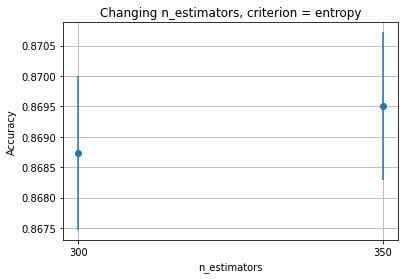

In [ ]:
from sklearn.ensemble import RandomForestClassifier

title = "Changing n_estimators, criterion = entropy"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in tqdm([300, 350]):
    text_clf = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

# export to plots
plot(title, xlabel, X, Y, error)
plt.savefig('../RF_change_N_4.png', bbox_inches='tight')
plt.show()